In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Hough Transforms

In [2]:
image = cv2.imread('../data/images/lanes.jpg')
if image is None:
    print("No image found")

In [3]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [4]:
edges = cv2.Canny(gray,50,200)

In [5]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100,minLineLength = 10,maxLineGap = 250)

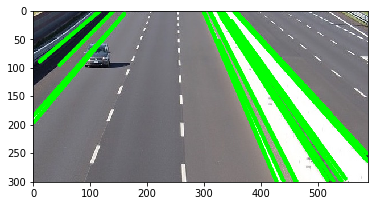

In [6]:
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),5,cv2.LINE_AA)
    
plt.imshow(image[:,:,::-1])

In [7]:
image = cv2.imread('../data/images/circles.jpg')
if image is None:
    print("No image found")

In [8]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [9]:
gray_blur = cv2.medianBlur(gray,5)

In [10]:
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 50, param1=450, param2=10, minRadius=30, maxRadius=40)

(2, 3)
[[[148 126  35]
  [468 128  34]]]


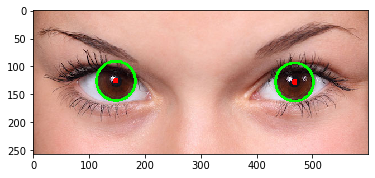

In [11]:
circles = np.uint16(np.round(circles))
print(circles[0].shape)
print(circles)
for circle in circles[0]:
    cv2.circle(image,(circle[0],circle[1]),circle[2],(0,255,0),3)
    cv2.circle(image,(circle[0],circle[1]),5,(0,0,255),-1)
plt.imshow(image[:,:,::-1])

## HDR Imaging(Computational photography)

In [12]:
def load_images_and_times():
    times = np.array([ 1/30.0, 0.25, 2.5, 15.0 ], dtype=np.float32)
   
  # List of image filenames
    images = []
    filenames = ["img_0.033.jpg", "img_0.25.jpg", "img_2.5.jpg", "img_15.jpg"]
    for file in filenames:
        image = cv2.imread("../data/images/"+ file)
        images.append(image)
    return images,times

In [13]:
images,times = load_images_and_times()

In [14]:
align_mtb = cv2.createAlignMTB()
align_mtb.process(images,images)

In [15]:
debevec = cv2.createCalibrateDebevec()
response_debevec = debevec.process(images,times)

In [16]:
merge_debevec = cv2.createMergeDebevec()
hdrimage = merge_debevec.process(images,times,response_debevec)

In [17]:
drago = cv2.createTonemapDrago(1.0,0.7)
image_hdr = drago.process(hdrimage)
image_hdr = 3 * image_hdr

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 2815.5, 2111.5, -0.5)

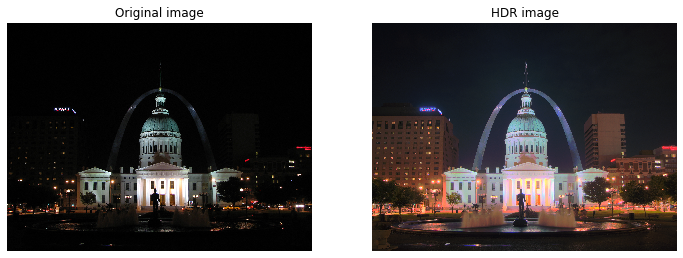

In [18]:
plt.figure(figsize=(12,12))

plt.subplot(121)
plt.imshow(cv2.imread("../data/images/img_0.25.jpg")[:,:,::-1])
plt.title("Original image")
plt.axis("off")

plt.subplot(122)
plt.imshow(image_hdr[:,:,::-1])
plt.title("HDR image")
plt.axis("off")

# Seamless Cloning

### Normal cloning

In [19]:
src = cv2.imread("../data/images/airplane.jpg")
dst = cv2.imread("../data/images/sky.jpg")

In [20]:
mask = 255*np.ones(src.shape,src.dtype)

In [21]:
output = cv2.seamlessClone(src,dst,mask,(800,100),cv2.NORMAL_CLONE)

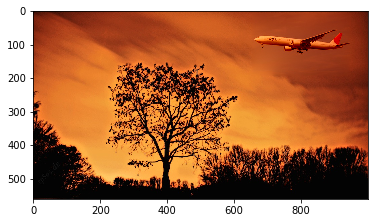

In [22]:
plt.imshow(output[:,:,::-1])

### MIxed Cloning

In [23]:
src = cv2.imread("../data/images/iloveyouticket.jpg")
dst = cv2.imread("../data/images/wood-texture.jpg")

In [24]:
mask = 255 * np.ones(src.shape,src.dtype)

In [25]:
output_clone = cv2.seamlessClone(src,dst,mask,(dst.shape[1]//2,dst.shape[0]//2),cv2.MIXED_CLONE)

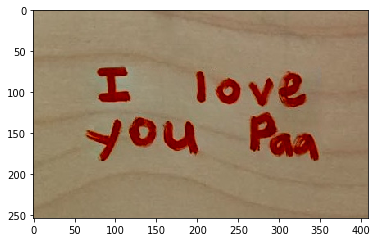

In [26]:
plt.imshow(output_clone[:,:,::-1])

In [27]:
src = cv2.imread("../data/images/obama.jpg")
dst = cv2.imread("../data/images/trump.jpg")
src_mask =cv2.imread("../data/images/obama-mask.jpg")

In [28]:
src.shape,dst.shape

((573, 500, 3), (573, 500, 3))

In [29]:
#Finding center of the source mask
# Find blob centroid
ret, src_mask_bin = cv2.threshold(src_mask[:,:,0], 128,255, cv2.THRESH_BINARY)
m = cv2.moments(src_mask_bin)
center = (int(m['m01']/m['m00']), int(m['m10']/m['m00']) )

In [30]:
output = cv2.seamlessClone(src,dst,src_mask,center,cv2.NORMAL_CLONE)

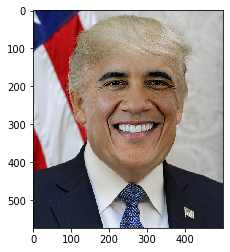

In [31]:
plt.imshow(output[:,:,::-1])

In [32]:
devansh = cv2.imread("../data/images/Devansh01.jpg")
vaibhav = cv2.imread("../data/images/vaibhav01.png")

In [33]:
devansh.shape,vaibhav.shape

((720, 1280, 3), (480, 640, 3))

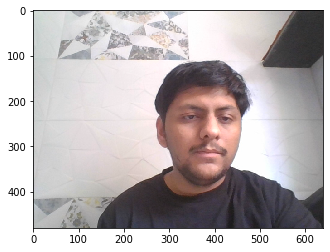

In [34]:
plt.imshow(vaibhav[:,:,::-1])

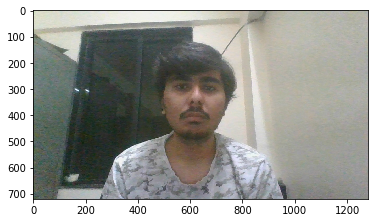

In [35]:
plt.imshow(devansh[:,:,::-1])

In [36]:
vaibhav_face = vaibhav[200:375,300:450]

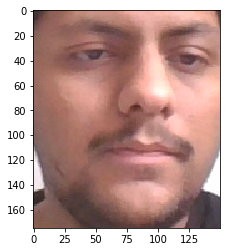

In [37]:
plt.imshow(vaibhav_face[:,:,::-1])

In [38]:
vaibhav_face.shape

(175, 150, 3)

In [39]:
devansh_face = devansh[250:475,510:725]

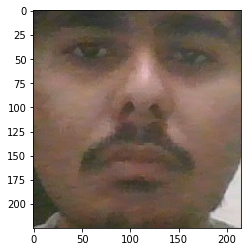

In [40]:
plt.imshow(devansh_face[:,:,::-1])

In [41]:
devansh_face = cv2.resize(devansh_face,(150,175),cv2.INTER_CUBIC)

In [42]:
devansh_face.shape

(175, 150, 3)

In [43]:
mask = 255*np.ones(devansh_face.shape,devansh_face.dtype)

In [44]:
output = cv2.seamlessClone(devansh_face,vaibhav_face,mask,(150//2,175//2),cv2.NORMAL_CLONE)

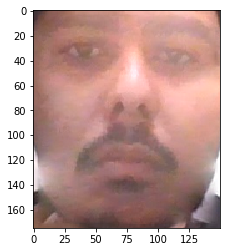

In [45]:
plt.imshow(output[:,:,::-1])

In [46]:
vaibhav_morphed = vaibhav.copy()

In [47]:
vaibhav_morphed[200:375,300:450] = output

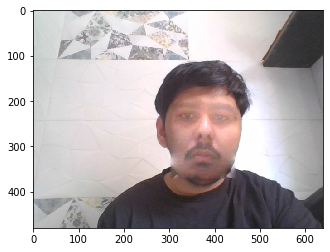

In [48]:
plt.imshow(vaibhav_morphed[:,:,::-1])